# Code to read in StarTrack data from Romagnolo 


In [13]:
import re
import pandas as pd
import numpy as np

# Cleaned column names (no 'skip_1', 'skip_2') + final 2 parsed from string
column_names = [
    't', 'Ka', 'Kb', 'Ma', 'Mb', 'a', 'e', 'ta_end', 'tb_end', 'inbin',
    'a0', 'e0', 'Mzamsa', 'Mzamsb', 'idum_run', 'iidd_old',
    'Tms', 'Tmr', 'Vsm0_0', 'Vsm0_1', 'Vsm0_2', 'Vsm_0', 'Vsm_1', 'Vsm_2',
    'MpgaA', 'MpgbA', 'KpgaA', 'KpgbA', 'apgA', 'epgA', 'tpgA', 'MendaA', 'dMcea', 'ecssna',
    'MpgaB', 'MpgbB', 'KpgaB', 'KpgbB', 'apgB', 'epgB', 'tpgB', 'MendbB', 'dMceb', 'ecssnb',
    'aspina', 'aspinb', 'aspina0', 'aspinb0', 'i0', 'iA', 'iB', 'Mcoa', 'Mcob',
    'twra', 'awra', 'ewra', 'Mwra', 'Mcoma', 'twrb', 'awrb', 'ewrb', 'Mwrb', 'Mcomb',
    'a_0', 'e_0', 'i_0', 'Om_0', 'om_0', 'tau_0', 'a_0a', 'e_0a', 'i_0a', 'Om_0a', 'om_0a', 'tau_0a',
    'a_1', 'e_1', 'i_1', 'Om_1', 'om_1', 'tau_1', 'a_2', 'e_2', 'i_2', 'Om_2', 'om_2', 'tau_2',
    'jx0', 'jy0', 'jz0', 'jx1', 'jy1', 'jz1', 'jx2', 'jy2', 'jz2',
    'ttms1a', 'tthg1a', 'ttrgb1a', 'ttcheb1a', 'ttagb1a', 'tthems1a', 'tthehg1a', 'tthergb1a',
    'ttms1b', 'tthg1b', 'ttrgb1b', 'ttcheb1b', 'ttagb1b', 'tthems1b', 'tthehg1b', 'tthergb1b',
    'nflags', 'flags'
]

# Original raw_column_units (without skip_1, skip_2) + added final two entries
raw_column_units = [
    'Myr', '#', '#', 'Msun', 'Msun', 'Rsun', '#', 'Myr', 'Myr', 'Myr',
    'Msun', 'Msun', '#', '#',
    'Myr', 'Myr', 'Rsun/day', 'Rsun/day', 'Rsun/day', 'Rsun/day', 'Rsun/day', 'Rsun/day',
    'Msun', 'Msun', '#', '#', 'Rsun', '#', 'Myr', 'Msun', 'Msun', '#',
    'Msun', 'Msun', '#', '#', 'Rsun', '#', 'Myr', 'Msun', 'Msun', '#',
    '#', '#', '#', '#', 'rad', 'rad', 'rad', 'Msun', 'Msun',
    'Myr', 'Rsun', '#', 'Msun', 'Msun', 'Myr', 'Rsun', '#', 'Msun', 'Msun',
    'Rsun', '#', 'rad', 'Om_0', 'om_0', 'Myr', 'Rsun', '#', 'rad', 'rad', 'rad', 'Myr',
    'Rsun', '#', 'rad', 'Om_1', 'om_1', 'Myr', 'Rsun', '#', 'rad', 'rad', 'rad', 'Myr',
    'Msun*Rsun^2/day', 'Msun*Rsun^2/day', 'Msun*Rsun^2/day', 'Msun*Rsun^2/day', 'Msun*Rsun^2/day',
    'Msun*Rsun^2/day', 'Msun*Rsun^2/day', 'Msun*Rsun^2/day', 'Msun*Rsun^2/day',
    'Myr', 'Myr', 'Myr', 'Myr', 'Myr', 'Myr', 'Myr', 'Myr',
    'Myr', 'Myr', 'Myr', 'Myr', 'Myr', 'Myr', 'Myr', 'Myr',
     '#', 'string'
]

def parse_dat_file_to_dataframe(filepath):
    with open(filepath, 'r') as f:
        content = f.read()

    # Each row is separated by a blank line
    blocks = re.split(r'\n\s*\n', content.strip())
    parsed_rows = []

    for block in blocks:
        lines = block.strip().split('\n')
        if not lines:
            continue

        # Extract numerical values from all but the last line
        values = []
        for line in lines[:-1]:
            tokens = line.strip().split()
            for token in tokens:
                try:
                    values.append(float(token))
                except ValueError:
                    values.append(np.nan)

        # Parse the final line: starts with number of flags, then strings
        final_tokens = lines[-1].strip().split()
        try:
            nflags = int(final_tokens[0])
            flags = ' '.join(final_tokens[1:1+nflags])
        except (ValueError, IndexError):
            nflags = 0
            flags = ''

        values += [nflags, flags]

        # Pad if necessary
        if len(values) < len(column_names):
            values += [np.nan] * (len(column_names) - len(values))
        values = values[:len(column_names)]

        parsed_rows.append(values)

    df = pd.DataFrame(parsed_rows, columns=column_names)
    df.attrs['units'] = dict(zip(column_names, raw_column_units))
    return df



In [14]:
# lines that you will have to change 
path = '/Users/floorbroekgaarden/Downloads/GROWL/Romagnolo24/ST_ouput/default/' # you will have to change this to your local folder
# filepath = "/mnt/data/example_file_startrack.dat"
file_name = 'compact_0001.dat' # example of one of the files (but we can change this)



In [15]:
# read in the data 

filepath = path+file_name
df = parse_dat_file_to_dataframe(filepath)

print(df.head())

# example for how to obtain units 
print("\nUnits for Ma:", df.attrs["units"]['Ma'])

# to convert dataset to csv:
# df.to_csv("parsed_startrack_data.csv", index=False)



           t    Ka    Kb         Ma         Mb             a         e  \
0  11.708709  14.0  14.0  11.414257   4.357860     11.394120  0.349769   
1   4.769680  14.0  14.0  31.051682  22.275211  97231.857539  0.029125   
2   5.084995  14.0  14.0  37.215386  25.029006   1154.709717  0.004119   
3   4.969125  14.0  14.0  47.678754  31.764784    291.470700  0.004136   
4   5.171991  14.0  14.0  20.900415  19.077695   2671.941739  0.001107   

     ta_end     tb_end  inbin  ...     ttms1b     tthg1b  ttrgb1b   ttcheb1b  \
0  7.038558  11.708708    1.0  ...  10.840801  10.857242     -1.0  11.660618   
1  4.223470   4.769679    1.0  ...   4.369367   4.373377     -1.0   4.585052   
2  3.926147   5.084994    1.0  ...   4.706962   4.710495     -1.0   4.899530   
3  3.637252   4.969124    1.0  ...   4.637975   4.640623     -1.0   4.640683   
4  5.072463   5.171990    1.0  ...   4.736727   4.741116     -1.0   5.060168   

   ttagb1b   tthems1b   tthehg1b  tthergb1b  nflags  \
0     -1.0  11.6751

In [16]:
# Plot some data 

M1 = df['Ma'].values # 'final mass of star 1 that was the more massive one on ZAMS in [Msun]'
print(M1)

M2 = df['Mb'].values ## 'final mass of star 1 that was the more massive one on ZAMS in [Msun]' [double chekc]
print(M2)


[11.414257 31.051682 37.215386 ... 11.869893 38.841533 18.363017]
[ 4.35786  22.275211 25.029006 ...  8.444063 20.447119 20.369935]


## let's do some plotting 

In [17]:
import matplotlib.pyplot as plt



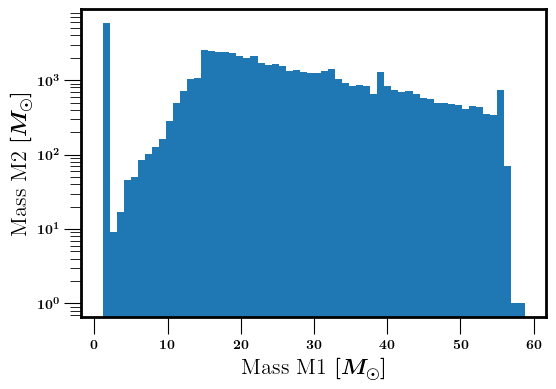

In [18]:
f, ax= plt.subplots(ncols=1,nrows=1, figsize=(6,4))
ax.hist(M1, bins=60)
ax.set_xlabel('Mass M1 $[M_{\odot}]$', fontsize=16)
ax.set_ylabel('Mass M2 $[M_{\odot}]$', fontsize=16)
ax.set_yscale('log')

plt.show()



## Fancy Fancy plotting (in case you are interested) 

In [19]:
import astropy.constants as c
import astropy.units  as u

## you can undo the lines below (but it will be fun for making fancy plots!)
# to make the lines below work, you have to download the file 'PostProcessingScripts' from https://github.com/FloorBroekgaarden/common_code
# and put this in the same directory as this one, and then only use the bottom line from this code below 
import sys
sys.path.append('../../common_code') 
from PostProcessingScripts import * 



### example usage of layoutAxes to make fancy plots

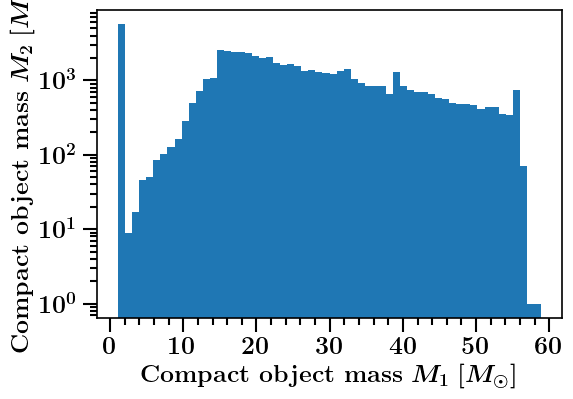

In [23]:
f, ax= plt.subplots(ncols=1,nrows=1, figsize=(6,4))
ax.hist(M1, bins=60)

#make fancy plot: 
fontsize=16
xlabel = r'$\textbf{Compact object mass}$ $M_1$ $[M_{\odot}]$'
ylabel = r'$\textbf{Compact object mass}$ $M_2$ $[M_{\odot}]$'
layoutAxes(ax=ax, nameX=xlabel, nameY=ylabel, fontsize=18) # this line is where the magic happens

ax.set_yscale('log')

plt.show()